In [1]:
# Import basic modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import power_transform

In [2]:
train=pd.read_csv("train.csv")
train.drop('Id', axis=1, inplace=True)

In [3]:
train_numeric = train.dtypes[train.dtypes != "object"].index
train_category = train.dtypes[train.dtypes == "object"].index

print(train_category)
print(train_numeric)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')
Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'Kitch

In [4]:
total = train.isnull().sum().sort_values(
        ascending=False)[train.isnull().sum().sort_values(ascending=False) != 0]
percent = (train.isnull().sum().sort_values(ascending=False) / len(train) *
               100)[(train.isnull().sum().sort_values(ascending=False) / len(train) *
                     100) != 0]
missing_values = pd.concat([total,percent], axis=1, keys=['Missing','Percent'])
missing_values

,Missing,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageCond,81,5.547945
GarageFinish,81,5.547945
GarageQual,81,5.547945


In [5]:
# for col in train_category:
#      train[col]=train[col].replace(np.nan, train[col].mode()[0], inplace=True)
for col in train_numeric:
    train[col].replace(np.nan, train[col].median(), inplace=True)
    train[col].replace(0.000000, 0.000001, inplace=True)

train = train.drop((missing_values[missing_values['Missing']>1]).index,1)
train = train.drop(train.loc[train['Electrical'].isnull()].index)


In [6]:
total = train.isnull().sum().sort_values(
        ascending=False)[train.isnull().sum().sort_values(ascending=False) != 0]
percent = (train.isnull().sum().sort_values(ascending=False) / len(train) *
               100)[(train.isnull().sum().sort_values(ascending=False) / len(train) *
                     100) != 0]
missing_values = pd.concat([total,percent], axis=1, keys=['Missing','Percent'])
missing_values.head(20)

,Missing,Percent


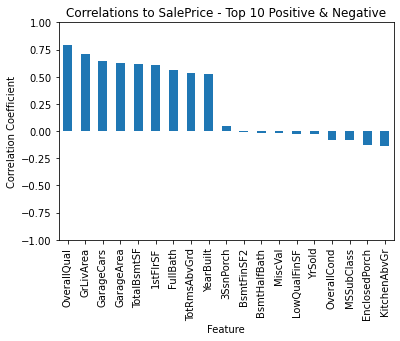

In [7]:
top20 = pd.concat([train.corr()['SalePrice'].sort_values(ascending=False)[1:10], train.corr()['SalePrice'].sort_values(ascending=False)[-10:]])
ax = top20.plot.bar()
ax.set_ylim(-1.0, 1.0)
plt.title("Correlations to SalePrice - Top 10 Positive & Negative")
plt.xlabel("Feature")
plt.ylabel("Correlation Coefficient")
plt.grid(False)
plt.show()

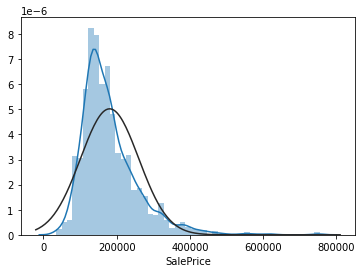

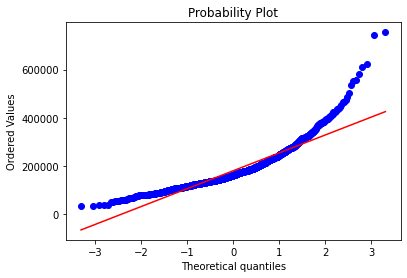

In [8]:
from scipy.stats import norm
from scipy import stats
sns.distplot(train.SalePrice, fit=norm);
fig = plt.figure()
res = stats.probplot(train.SalePrice, plot=plt)

In [9]:
train=train[['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea',
 'SalePrice']]

# train.dtypes
train_data=pd.DataFrame((power_transform(train,method='box-cox')),columns=train.columns)
train_data.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
0,0.665074,1.152904,0.909006,-0.344028,-0.800616,0.528249,0.796894,0.943776,0.361842,0.409717,0.570980
1,-0.044991,0.007832,-0.620610,0.514789,0.428200,-0.382695,0.796894,-0.234524,0.361842,0.098643,0.227572
2,0.665074,1.056422,0.836583,-0.198729,-0.569561,0.658787,0.796894,-0.234524,0.361842,0.608043,0.741635
3,0.665074,-1.629417,-0.862569,-0.580590,-0.430468,0.540510,-1.007252,0.387692,1.353329,0.716215,-0.425218
4,1.351475,1.008938,0.695954,0.281115,0.123679,1.282396,0.796894,1.447842,1.353329,1.286337,1.014964


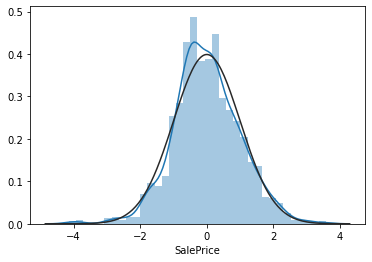

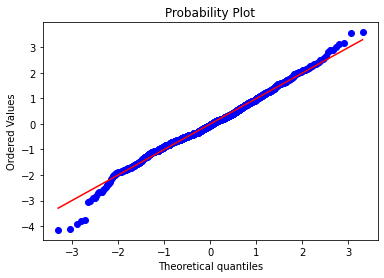

In [10]:
# train.SalePrice = np.log(train.SalePrice)

sns.distplot(train_data.SalePrice, fit=norm);
fig = plt.figure()
res = stats.probplot(train_data.SalePrice,plot=plt)

In [11]:
# Train-test split
from sklearn.model_selection import train_test_split

X = train_data.drop(['SalePrice'], axis=1).values

# Square root of the output to make high values less dominant
y = (train_data['SalePrice'].values)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print(X_train.shape,y_train.shape)

(977, 10) (977,)


In [12]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

alphas=np.array([1,0.1,0.01,0.001,0.0001,0])
model=Lasso()
grid=GridSearchCV(estimator=model,param_grid=dict(alpha=alphas))
train_fit=grid.fit(X_train,y_train)
grid_train_score=grid.best_score_
test_fit=grid.fit(X_test,y_test)
grid_test_score=grid.best_score_
predictions=grid.predict(X_test)
lass_MSE=mean_squared_error(y_test,predictions)

alpha=grid.best_estimator_.alpha

lr = LinearRegression()
lr.fit(X_train,y_train)
lr_train_score=lr.score(X_train,y_train)
lr_test_score=lr.score(X_test,y_test)
lr_predictions=lr.predict(X_test)
lr_MSE=mean_squared_error(y_test,lr_predictions)


print(f"Linear Regression training score: {lr_train_score}") 
print(f"Linear Regression test score: {lr_test_score}")
print(f"Linear Regression MSE: {lr_MSE}")


print(f"Best Alpha: {grid.best_estimator_.alpha}")
print(f"Lasso training score for alpha={alpha}: {grid_train_score}") 
print(f"Lasso testing score for alpha={alpha}: {grid_test_score}")
print(f"Lasso Regression MSE: {lass_MSE}")
# print(f"number of features used for alpha={alpha}: {coeff_used00001}")



Linear Regression training score: 0.8216619405119419
Linear Regression test score: 0.8465824560483676
Linear Regression MSE: 0.178314606624801
Best Alpha: 0.01
Lasso training score for alpha=0.01: 0.8086112530702091
Lasso testing score for alpha=0.01: 0.8475848314063339
Lasso Regression MSE: 0.1641635929357471
